<a href="https://colab.research.google.com/github/oujianjiu/12919712/blob/master/31005_Assessment%201_Jianjiu%20Ou_12919712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Draft and Experiment Area

1. First impression
    * What is my chosen paper to read?<br>
      Gradient-Based Learning Applied to Document Recognition
      
    * What type of the main contribution the paper has made?<br>
      The paper reviews the Gradient-Based Learning algorithms to synthesized high dimensional patterns with complex decision surface. (such as handwritten characters)<br>
        - A theory or proposition (revealing something, from unknown to known)
        - A method or algorithm (inventing a technique, from undoable to doable 
    * _Before_ reading the main body of the paper, write down your first impression  obtained from its abstract and short introduction.<br>

      Beofre I am reading the main body, the first impression of this paper is proposing a new methodology to building a learning paradigm (called Graph Transformer Networks (GTN)). It also use Convolutional Neural Network combined with gobal training technology to provides record accuary on business and personal checks.<br>
      In this study, the research group considers the tasks of handwritten character recognition system build in the GTN and compare the performance of different learning techniques on a benchmark dataset (handwritting digit recognition).  (P.27)<br>
    * Why does the paper attract you, such as, How it surprised you? Why do you think it addresses an important topic that will be helpful in your future study of machine learning?<br>

    
2. Read the paper abstract and introduction, list here all the notions that you don't know the precise meaning. If you think you have completed your list,  compare the list with people around you who have chosen the same or a similar paper.

3. (During the next 7 days) Re-consider the central problem of the paper.

In [1]:
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
#import the dataset from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("trainShape: ",train_images.shape)
print("testShape: ", test_images.shape)
print(train_labels)

trainShape:  (60000, 28, 28)
testShape:  (10000, 28, 28)
[5 0 4 ... 5 6 8]


In [0]:
from keras import models
from keras import layers

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0827 08:00:11.426995 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 08:00:11.447591 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 08:00:11.451345 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 08:00:11.472434 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
model.summary()
#You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of
#shape (height, width, channels). 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
# add fully conncted layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

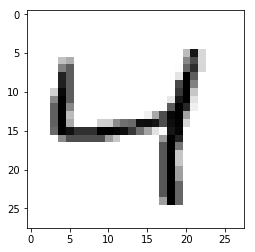

In [8]:
digit = train_images[2]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
#resize the data from 0-255 to 0-1
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
trainModel=model.fit(train_images, train_labels, epochs=10, batch_size=64)

W0827 08:00:12.003512 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 08:00:12.027810 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 08:00:12.140110 140687783507840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 08:00:12.267391 140687783507840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.1766 - acc: 0.9446
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0473 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0335 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0246 - acc: 0.9927
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0196 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0163 - acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0132 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0118 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0100 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0082

In [10]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from sklearn.metrics import classification_report
test_pred = model.predict(test_images, verbose=1, batch_size=64).argmax(axis=1)
test_true=test_labels.argmax(axis=1) 
print(classification_report(test_true, test_pred, target_names=["0","1","2","3","4","5","6","7","8","9"]))

10000/10000 [==============================] - 0s 50us/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



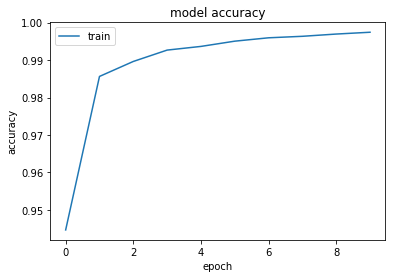

In [14]:
plt.plot(trainModel.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

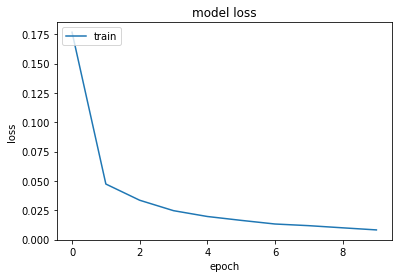

In [15]:
plt.plot(trainModel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Review Report on "Gradient-Based Learning Applied to Document Recognition"

## Introduction



## Content

The paper proposes multilayer neural network trained with the backpropagation algorithm that can be used to recognise high-dimensional patterns such as handwritten characters. Furthermore, this paper reviews various methods applied to handwritten character recognition, the results of the methods are compared to a handwritten digit recognition standard task. The challenge of this research is constructing a better pattern recognition system that can rely more on automatic learning but less on hand-designed heuristics at the same time. In this case of study, Convolutional Neural Network (CNN) are mainly used in this task, such as by using the combination of Convolutional Neural Network pattern/character recognizer and global training techniques to estimate result accuracy on personal checks and business. 
The paper contains 10 main sections, which covers multiple topics and techniques in patterns and characters recognition. In this report will only focus on the sections of convolutional neural network. By review the convolutional neural network section, the technique that being used in the research is LeNet-5, which is the first generation of CNN that developed in 1998. CNN is a deep learning model or multi-layer perceptron, it is one of the representative algorithms of deep learning, which is commonly used to analyse visual images. In this paper, the research group uses LeNet-5 to extract the features of handwritten characters by training on the regular MINIST database in 5 layers. Shown in figure 1 below, a general LeNet-5 CNN approach for image classification has 3 main layers: Convolutional Layers, Subsampling Layers (or Pooling Layer) and Fully-Connected layers. <br>
  * Convolutional Layer: In the convolution layer, the matrix is generated by calculating the region of the input image and the weight matrix of the filter, and the result is taken as the output of this layer. Normally the input used to be a matrix of N*M*3 image, where N and M are the units (pixels) of the height and width. 3 is the colour channels that represent to red, green and blue. In this case of study, the use of training data in LeNet-5 model is grey scale handwritten digit pattern, therefore, the input is 1 channel and input for LeNet-5 model is a 32*32 grayscale image with 6 feature maps or filters having size 5*5 in the first layer.  There are some filters that apply in convolution layer, these filters are used to extract the features of the image, such as curves and stripes. The output of the first convolutional layer changes from 32*32*1 to 28*28*6.<br>
  <br>
  There are 2 convolutional layers in LeNet-5 model, as the figure 1 describes, the second convolutional layer contains 16 feature maps with 5*5 size and a stride of 1. Therefore, in this layer, 16 features maps are used to connect to the 6 features maps from the previous layer (subsampling layer) and output 16 features in 10*10 size. <br>
  <br>
  * Subsampling Layer: The subsampling Layer has the another name “Pooling Layer” in the recently study of CNN. Generally, there are two widely used pooling approaches: max pooling and average pooling, where max pooling is the most used of the two and having a better performance in most the cases. The subsampling layer is used to reduce the dimensions of feature space in the convolution neural network, but does not reduce the depth(channel). The output of the subsampling can be used for the next convolution layer or the fully connected layer. In this case of study, the size of the LeNet-5 subsampling matrix is in size of 2*2.<br>
  <br>
  *	Fully-connected layer: Fully connected layer is taking the most important role, it flattens the output of the last convolutional layer and connect to number of nodes that the researchers want to classify. The output of the fully connect layer is generated by training these number of nodes and use “softmax” to gain the probability of the result.<br>
  <br>Figure1
  <br>
  
  This LeNet-5 CNN method in the paper achieved an outstanding result with lower than 1% Error rate in training set with 6000 sample. Comparing to others patterns recognition system, LeNet-5 CNN is one of the most competitive techniques in handwritten recognition system in 1998. 



## Innovation

The paper introduces multiple techniques and methods to achieve the success in handwritten characters recognition system, in this innovation section here, we are focusing on the Convolutional Neural Network (CNN) approach. In this paper, it proposes a new model “LeNet-5” in CNN, it is an advanced and ahead in patterns and characters recognition in 1980s. It is the first model that using subsampling layer right after convolution layer in the system of convolutional neural network and it can be considered as the prototype of modern CNN. <br>
<br>
By reviewing the paper, LeNet-5 model is mainly used to identify and classify handwritten characters, it had been used in US banks for reading bank checks oftenly. The implementation of LeNet-5 established the structure of CNN. Now many of the contents of the neural network can be seen in the network structure of LeNet-5, such as convolution layer, Pooling layer and ReLU layer. Although LeNet-5 was introduced as early as the 1990s, the lack of large-scale training data at that time, the performance of computer hardware is also low, so LeNet-5 neural network is not ideal when dealing with complex problems.<br>
<br>
In summary, the model of LeNet-5 had achieved the success in handwritten characters recognition system, but it is for the small number of dataset. In the view of today’s research in CNN, it is more used in large and complicate images classification and analyse. In this case, 5 layers of convolution are not enough for large scale and complicate patterns and images classification.   


## Technical quality

The paper uses the LeNet-5 CNN model to identify and classify handwritten characters by inputting the images in size of 32*32 pixel. There are 2 main training sets of handwritten digital SD-1 and SD-3 from NIST database, SD-1 was collected by among of high school students and SD-3 was collected by among Census Bureau employees. The result of accuracy after training 2 dataset clearly defines SD-3 had achieved a much better performance. However, the training data is prejudicial, in other words, the input data examples will only represent to this two groups of people, it can be treated as biased. <br>
<br>
	In another hand, the model LeNet-5 itself has 5 hidden layers, which are convolutions, subsampling and full connected layers. In the year of 1980s, due the performance of computer hardware LeNet-5 can input small scale of image or patterns such as 32*32 pixel.  After 2 steps of each convolutions and subsampling, the features map(filters) finally generates a 16*6 matrix which represents the features of selecting pattern or image. Furthermore, as the network deepens in LeNet-5, the accuracy of the training set decreases, this will be known as Network degradation.  In today’s research, small scale patterns will not satisfy the modern deep learning development, it needs more trainable hidden layers and developed feature maps to extract different types of features from the large scale of patterns such as ResNet50. To solve the Network degradation (such as ResNet50) problem, deep residual network is designed to overcome the problem that the learning efficiency is low due to the deepening of the network, and the accuracy cannot be effectively improved.  


## Application and X-factor

This research paper had applied to handwritten patterns and images recognition system in 1980s, it achieved a significant success in the past 10 years, it read millions of checks per month in several banks across the United States. As we discuss in the technical quality section, LeNet-5 is used in small scale images and patterns, in this case, CNN can be used in some small images classification, objects detection.<br>
<br>
	In the features of CNN development, such as today’s deep learning research, CNN can to others domains can be images and patterns in histological images. such as using CNN techniques with computer aided diagnosis (CAD) system that it can able to promote the quality of medical imaging diagnostics exanimation. Referencing to Kennedy’s research, Histopathological examination in the medical field is one of the most important indicators of prognosis in patients with Neuroblastoma [1]. The research group uses ResNet50 to classify 5 different categories of Neuroblastoma with around 0.90 F1-socre in each classes. <br>
  <br>
	In my perspective, the development of CNN can be a good discussion in class, the interesting part of CNN is the progress of deep learning approaches. By using deep residual network to train the dataset such as using ResNet50 and configuring the data augmentations such as zooming and rotating the images to find out the best performance.


## Presentation

First of all, this paper is published by Yann LuCun who is one of the initiators of Convolutional Neural Network, the paper proposes the first idea of convolutional neural network used in images and pattern recognition and with the successful implementation in 1980s. The paper contains the general content of deep learning, even it was published in 1998. The information and the experiments that present in the paper are highly relevant to the topic. There are 10 subsection contained in the paper, each of this sections are close to one content, which is how to construct a better pattern recognition system that can rely more on automatic learning but less on hand-designed heuristics at the same time. As the result, CNN can be one of the best chooses. 

## References
[1]  Gheisari, S., Catchpoole, D.R., Charlton, A. & Kennedy, P.J. 2018, 'Convolutional deep belief network with feature encoding for classification of neuroblastoma histological images', *Journal of pathology informatics*, vol. 9, no. 1, p.17.
<br><br>
[2]  LeCun, Y., Bottou, L., Bengio, Y. and Haffner, P. 1998, 'Gradient-based learning applied to document recognition', *Proceedings of the IEEE*, vol.86, pp.2278-2324.
<br>
